<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/03machinelearning/chapter5/ejercio_clase10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Exercise #0308

### 1. Classification with Tree:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### 1.1. Read in data:

In [ ]:
# Go to the directory where the data file is located.
# os.chdir(r'~~')                # Please, replace the path with your own.

In [2]:
# Read the already pre-processed data.
df = pd.read_csv('data_titanic_2.csv', header='infer')

In [3]:
df.shape

(889, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Embarked_Q        889 non-null    bool 
 1   Embarked_S        889 non-null    bool 
 2   Sex_male          889 non-null    bool 
 3   Parch_1           889 non-null    bool 
 4   Parch_2           889 non-null    bool 
 5   Parch_3           889 non-null    bool 
 6   Parch_4           889 non-null    bool 
 7   Parch_5           889 non-null    bool 
 8   Parch_6           889 non-null    bool 
 9   SibSp_1           889 non-null    bool 
 10  SibSp_2           889 non-null    bool 
 11  SibSp_3           889 non-null    bool 
 12  SibSp_4           889 non-null    bool 
 13  SibSp_5           889 non-null    bool 
 14  SibSp_8           889 non-null    bool 
 15  Pclass_2          889 non-null    bool 
 16  Pclass_3          889 non-null    bool 
 17  Age_(21.0, 30.0]  889 non-null    b

In [5]:
df.isnull().sum()

,0
Embarked_Q,0
Embarked_S,0
Sex_male,0
Parch_1,0
Parch_2,0
Parch_3,0
Parch_4,0
Parch_5,0
Parch_6,0
SibSp_1,0


In [6]:
df.head(3)

,Embarked_Q,Embarked_S,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3,"Age_(21.0, 30.0]","Age_(30.0, 35.0]","Age_(35.0, 80.0]",Survived
0,False,True,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,0
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,1
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,1


In [10]:
df.columns


Index(['Embarked_Q', 'Embarked_S', 'Sex_male', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Pclass_2', 'Pclass_3',
       'Age_(21.0, 30.0]', 'Age_(30.0, 35.0]', 'Age_(35.0, 80.0]', 'Survived'],
      dtype='object')

In [7]:
X = df.drop(columns=['Survived'])
Y = df.Survived

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 1.2. Tree hyperparameter optimization:

In [12]:
model = DecisionTreeClassifier()

In [13]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [14]:
Y_pred = model.predict(X_test)

In [15]:
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Tree best accuracy : 0.79


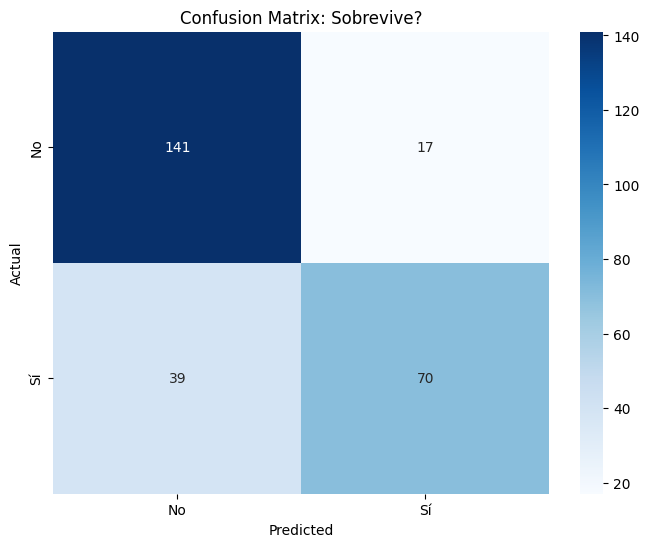

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Sobrevive?')
plt.show()

In [17]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       158
           1       0.80      0.64      0.71       109

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



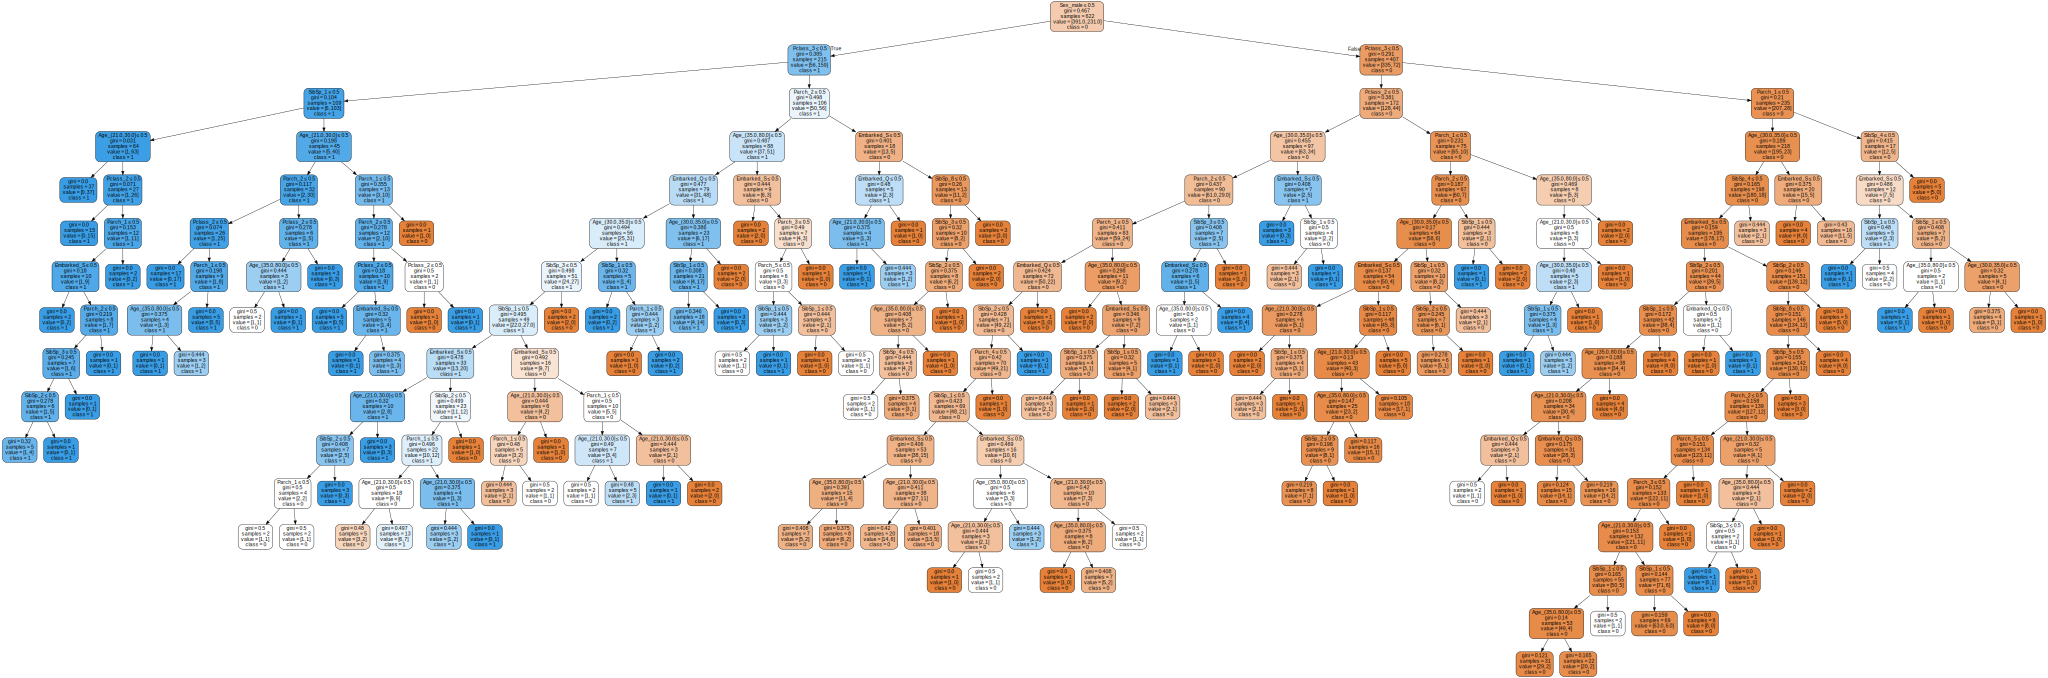

In [24]:
import graphviz
from sklearn.tree import export_graphviz

# Generar datos en formato DOT
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=[str(c) for c in model.classes_],
                           filled=True, rounded=True,
                           special_characters=True)

# Crear y mostrar el gráfico
graph = graphviz.Source(dot_data)
graph.render("Sobrevive_decision_tree", format="pdf", cleanup=True)
graph

In [18]:
depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(10,31)
max_leaf_nodes_grid = np.arange(2,21)
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

In [19]:
gridCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, n_jobs = -1)        # estimator = an instance of DecisionTreeClassifier.
gridCV.fit(X_train, Y_train);
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

In [20]:
print("Tree best depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))

Tree best depth : 3
Tree best min_samples_leaf : 23
Tree best max_leaf_nodes : 6


In [21]:
DTC_best = DecisionTreeClassifier(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,max_leaf_nodes=best_max_leaf_nodes)
DTC_best.fit(X_train, Y_train);
Y_pred = DTC_best.predict(X_test)
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Tree best accuracy : 0.82


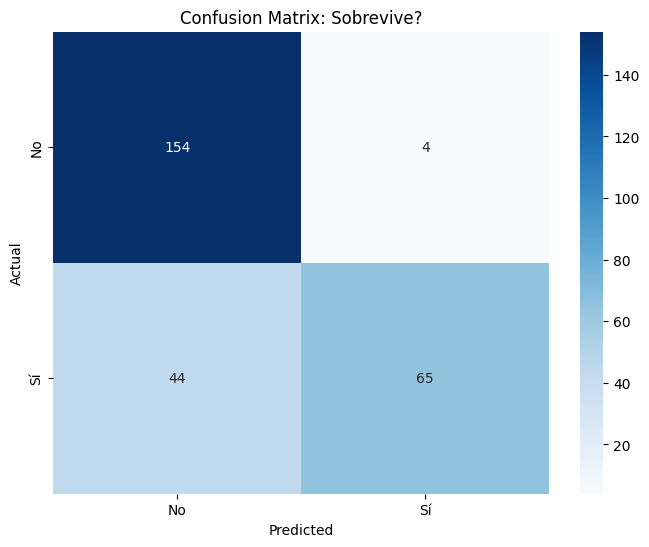

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Sobrevive?')
plt.show()

In [23]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       158
           1       0.94      0.60      0.73       109

    accuracy                           0.82       267
   macro avg       0.86      0.79      0.80       267
weighted avg       0.84      0.82      0.81       267



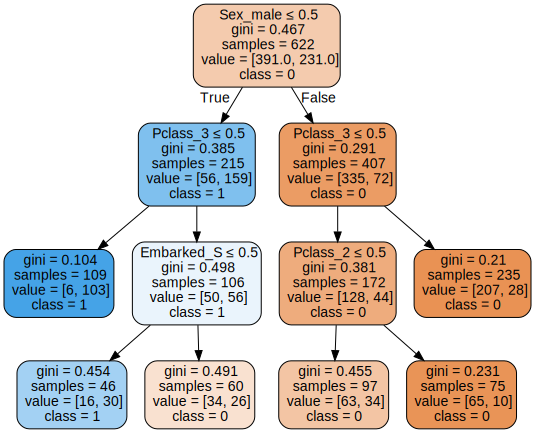

In [25]:
import graphviz
from sklearn.tree import export_graphviz

# Generar datos en formato DOT
dot_data = export_graphviz(DTC_best, out_file=None,
                           feature_names=X.columns,
                           class_names=[str(c) for c in DTC_best.classes_],
                           filled=True, rounded=True,
                           special_characters=True)

# Crear y mostrar el gráfico
graph = graphviz.Source(dot_data)
graph.render("BEST_Sobrevive_decision_tree", format="pdf", cleanup=True)
graph

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [29]:
# Regresion logistica
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

print( "Logistic Regression accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))


Logistic Regression accuracy : 0.798


In [30]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       158
           1       0.81      0.66      0.73       109

    accuracy                           0.80       267
   macro avg       0.80      0.78      0.78       267
weighted avg       0.80      0.80      0.79       267

